In [1]:
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

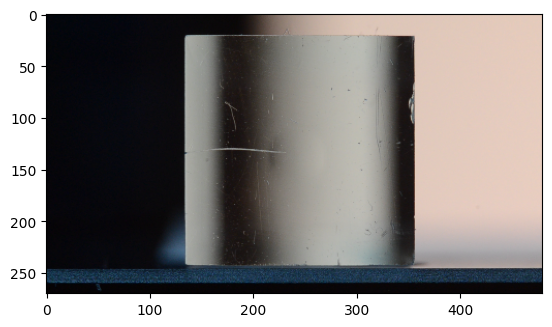

In [92]:
img = cv2.imread("O2_videos_frames/EJ200PS-1X1P-3/FaceA/frame0.png")
w, h, c = img.shape
resize_coeff = 0.25
img = cv2.resize(img, (int(resize_coeff * h), int(resize_coeff * w)))
plt.imshow(img)

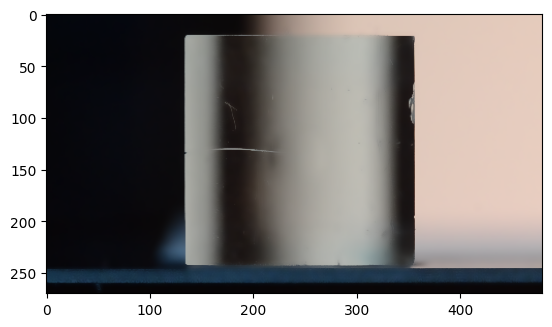

In [146]:
blur = img.copy()
# blur = cv2.medianBlur(blur, 5)
blur = cv2.bilateralFilter(blur, 9, 75, 75)
plt.imshow(blur)

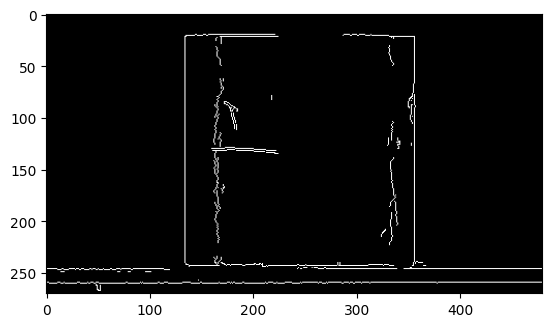

In [155]:
edges = cv2.Canny(blur, 60, 80)
plt.imshow(edges, cmap="gray")

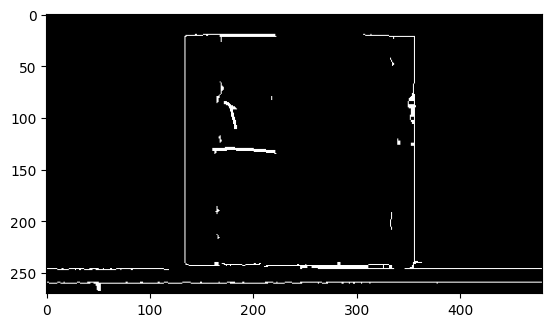

In [148]:
edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
plt.imshow(edges, cmap="gray")

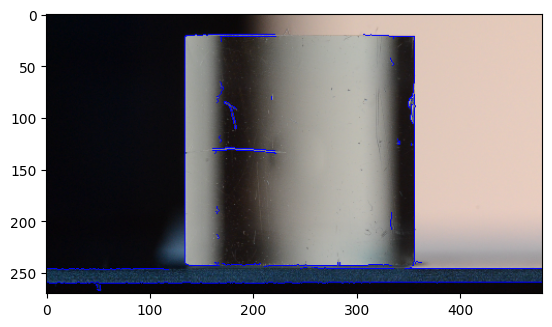

In [152]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 0, 255), 1)
plt.imshow(img_contours)

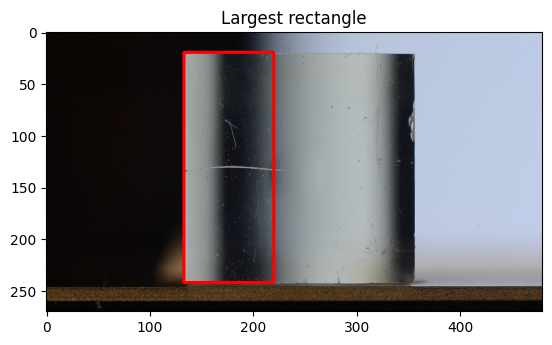

In [153]:
rects = [cv2.minAreaRect(ctr) for ctr in contours]
largest_rect = max(rects, key=lambda rect: rect[1][0] * rect[1][1])
box = cv2.boxPoints(largest_rect)
box = np.int0(box)
img_box = cv2.drawContours(img.copy(), [box], 0, (0, 0, 255), 2)
plt.figure()
plt.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
plt.title("Largest rectangle")
plt.show()

In [154]:
largest_rect[-1]

0.0

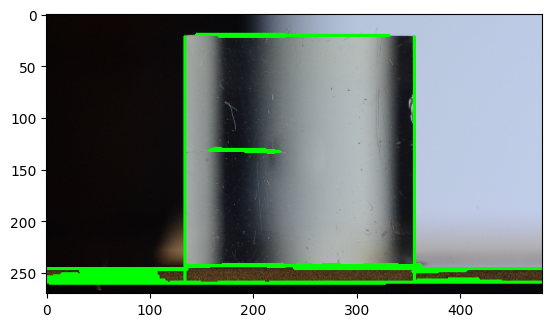

In [42]:
# Assuming you've performed Canny edge detection and got 'edges'
lines = cv2.HoughLinesP(
    closed, rho=1, theta=np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10
)

# 'lines' is a 3D array containing line coordinates
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
w, h, c = img.shape
blank = np.zeros((w, h)).astype(np.uint8)
cv2.drawContours(blank, contours, -1, 1, 1)
blank = cv2.morphologyEx(blank, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))
contours, _ = cv2.findContours(blank, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
areas = [cv2.contourArea(c) for c in contours]
perimeters = [cv2.arcLength(c, True) for c in contours]

In [7]:
contours = [c for c in contours if cv2.contourArea(c) > 500]
contours = [c for c in contours if cv2.arcLength(c, True) > 2000]
img_contours = cv2.drawContours(img, contours, -1, (0, 0, 255), 1)

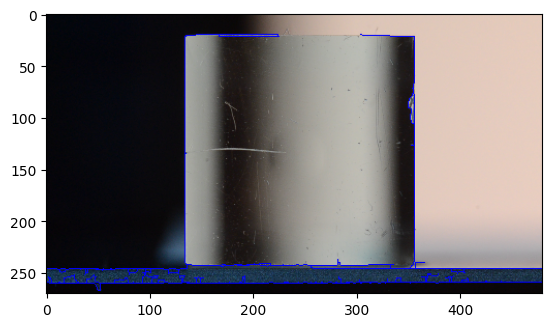

In [8]:
plt.imshow(img_contours)

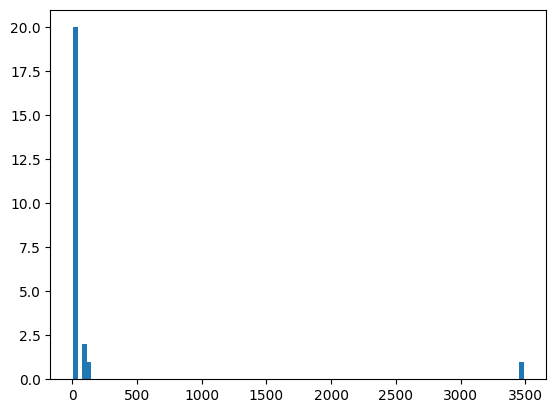

In [47]:
# plt.hist(areas, bins=100);
plt.hist(perimeters, bins=100);